In [1]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
data = pd.read_csv('adult_data.csv')
test = pd.read_csv('adult_test.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
data[['education-num']].sum()

education-num    328237
dtype: int64

In [18]:
data.shape

(32561, 15)

In [25]:
test.shape

(16281, 15)

In [26]:
pd.unique(data['education'])

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [28]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


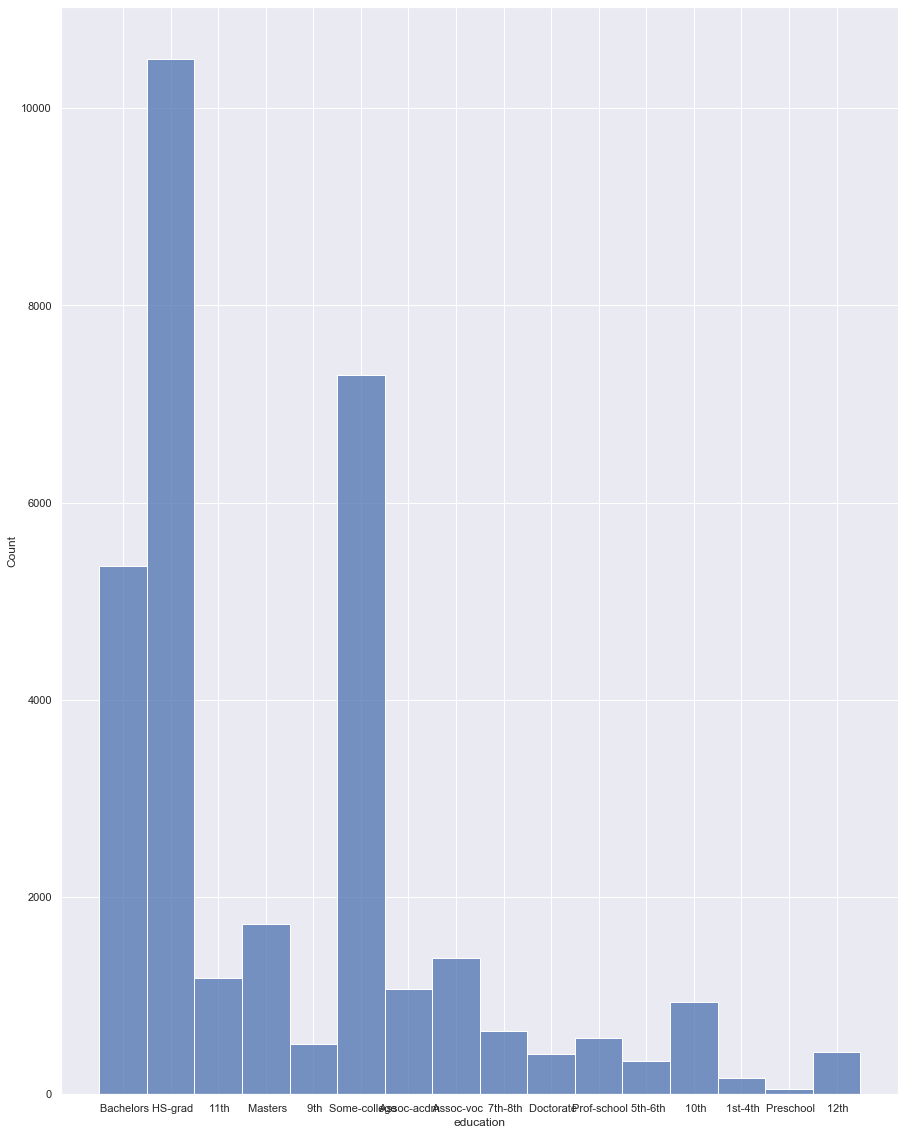

In [32]:
fig = plt.figure(figsize = (15,20))
axis = fig.gca()
sns.histplot(data.education, ax = axis);

In [45]:
data2 = data[["salary", "sex"]] = data[["salary", "sex"]].apply(pd.to_numeric, errors='ignore')

In [48]:
data2.head()

,salary,sex
0,<=50K,Male
1,<=50K,Male
2,<=50K,Male
3,<=50K,Male
4,<=50K,Female


In [7]:
frames = [data, test]
combined = pd.concat(frames)

In [8]:
combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [60]:
combined.shape

(48842, 15)

In [57]:
combined.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


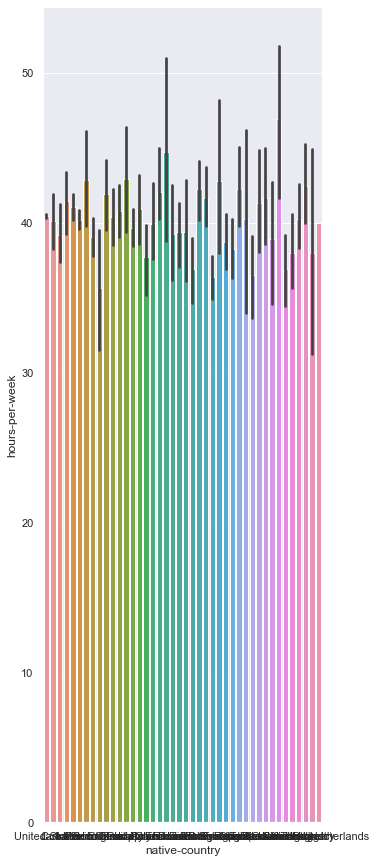

In [10]:
fig = plt.figure(figsize = (5,15))
axis = fig.gca()
sns.barplot(data = combined, x='native-country',y='hours-per-week');

<AxesSubplot:xlabel='age', ylabel='Count'>

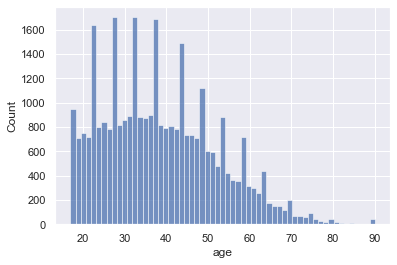

In [73]:
sns.histplot(data.age)

In [77]:
data.sum()

age                                                         1256257
workclass          State-gov Self-emp-not-inc Private Private Pr...
fnlwgt                                                   6179373392
education          Bachelors Bachelors HS-grad 11th Bachelors Ma...
education-num                                                328237
marital-status     Never-married Married-civ-spouse Divorced Mar...
occupation         Adm-clerical Exec-managerial Handlers-cleaner...
relationship       Not-in-family Husband Not-in-family Husband W...
race               White White White Black Black White Black Whi...
sex                Male Male Male Male Female Female Female Male...
capital-gain                                               35089324
capital-loss                                                2842700
hours-per-week                                              1316684
native-country     United-States United-States United-States Uni...
salary            <=50K<=50K<=50K<=50K<=50K<=50K

In [11]:
sns.histplot(data.occupation, ax = axis);

In [18]:
data.groupby(['occupation'])['hours-per-week'].mean().sort_values(ascending=False)

occupation
 Farming-fishing      46.989940
 Exec-managerial      44.987703
 Transport-moving     44.656230
 Protective-serv      42.870570
 Prof-specialty       42.386715
 Craft-repair         42.304221
 Sales                40.781096
 Machine-op-inspct    40.755744
 Armed-Forces         40.666667
 Tech-support         39.432112
 Handlers-cleaners    37.947445
 Adm-clerical         37.558355
 Other-service        34.701669
 Priv-house-serv      32.885906
 ?                    31.906131
Name: hours-per-week, dtype: float64

In [17]:
len(data[(data['capital-loss'] > 0)])

1519

In [19]:
data.groupby(['native-country'])['hours-per-week'].mean().sort_values(ascending=False)   #highest mean value of hours per week

native-country
 Thailand                      45.444444
 France                        45.068966
 Yugoslavia                    44.562500
 Greece                        44.241379
 Iran                          43.976744
 Japan                         43.693548
 Dominican-Republic            42.471429
 Ireland                       42.416667
 South                         42.412500
 Portugal                      41.891892
 Outlying-US(Guam-USVI-etc)    41.857143
 England                       41.833333
 Italy                         41.602740
 India                         41.530000
 ?                             41.512864
 Scotland                      41.250000
 Germany                       41.014599
 Hong                          40.900000
 Cambodia                      40.894737
 United-States                 40.447755
 Canada                        40.404959
 Mexico                        40.340591
 Laos                          40.333333
 Holand-Netherlands            40.000000
 

<AxesSubplot:xlabel='salary', ylabel='count'>

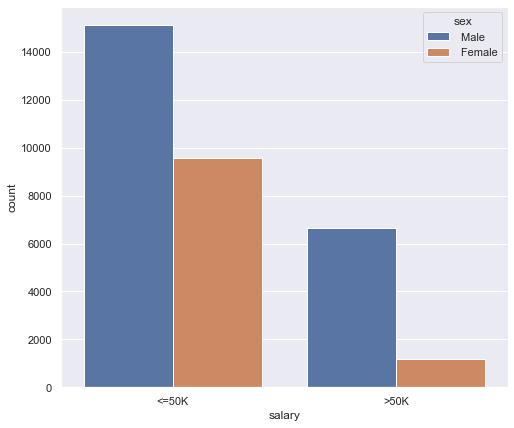

In [20]:
sns.set({'figure.figsize': (8,7)})
sns.countplot(data=data, x='salary', hue='sex')   #plot salary and sex variables